# Environment Setup

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn as sk

# Data Loading

In [3]:
_df = pd.read_csv("./input/dummy_df.csv", index_col=0)
_df

,year,artist.inverted,track,time,date.entered,date.peaked,week,rank,gap_week,total_time_s,...,date.peaked.quarter,genre_Electronica,genre_Gospel,genre_Jazz,genre_Latin,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Rock
0,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,1,78,False,218,...,4,0,0,0,0,0,0,0,0,1
317,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,2,63,False,218,...,4,0,0,0,0,0,0,0,0,1
634,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,3,49,False,218,...,4,0,0,0,0,0,0,0,0,1
951,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,4,33,False,218,...,4,0,0,0,0,0,0,0,0,1
1268,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,5,23,False,218,...,4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,2000-09-02,1,99,False,210,...,3,0,0,0,0,0,0,0,0,1
631,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,2000-09-02,2,99,False,210,...,3,0,0,0,0,0,0,0,0,1
315,2000,The Eastsidaz,Got Beef,3:58,2000-07-01,2000-07-01,1,99,False,238,...,3,0,0,0,0,0,0,1,0,0
632,2000,The Eastsidaz,Got Beef,3:58,2000-07-01,2000-07-01,2,99,False,238,...,3,0,0,0,0,0,0,1,0,0


# Outliers

In [4]:
reg_df = _df[['total_time_s', 'rank']]
reg_df

,total_time_s,rank
0,218,78
317,218,63
634,218,49
951,218,33
1268,218,23
...,...,...
314,210,99
631,210,99
315,238,99
632,238,99


<Axes: >

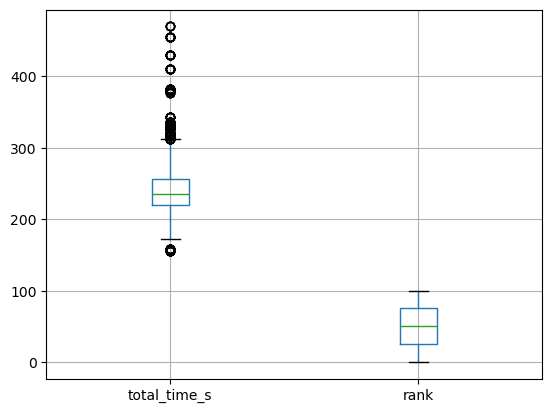

In [5]:
reg_df.boxplot()

In [6]:
_25p = reg_df['total_time_s'].quantile(.25)
_75p = reg_df['total_time_s'].quantile(.75)
_iqr = _75p - _25p
_out_range = 1.5 * _iqr

In [7]:
print( _25p, _75p, _iqr, _out_range)

220.0 257.0 37.0 55.5


In [8]:
_bottom_limit = _25p - _out_range
_top_limit = _75p + _out_range
print (_bottom_limit, _top_limit)

164.5 312.5


In [9]:
out_reg_df = reg_df[(reg_df['total_time_s']<=_top_limit) & (reg_df['total_time_s']>=_bottom_limit)]

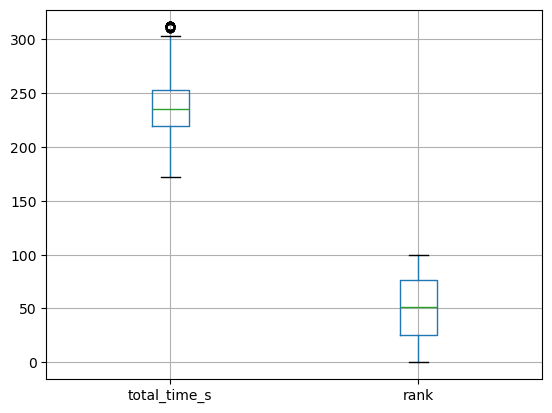

In [10]:
out_reg_df.boxplot()
plt.show()

# Features and Target Split

In [11]:
X = out_reg_df.drop(columns=['rank'])
y = out_reg_df[['rank']]

# Scaling

## Features

In [12]:
from sklearn.preprocessing import StandardScaler

features_standard_scaler = StandardScaler().fit(X).set_output(transform='pandas')
features_scale_df = features_standard_scaler.transform(X)
features_scale_df

,total_time_s
0,-0.644739
317,-0.644739
634,-0.644739
951,-0.644739
1268,-0.644739
...,...
314,-0.941175
631,-0.941175
315,0.096351
632,0.096351


## Target

In [13]:
target_standard_scaler = StandardScaler().fit(y).set_output(transform='pandas')
target_scale_df = target_standard_scaler.transform(y)
target_scale_df

,rank
0,0.932877
317,0.421702
634,-0.055395
951,-0.600648
1268,-0.941431
...,...
314,1.648522
631,1.648522
315,1.648522
632,1.648522


# Train-Test-Split

In [14]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(features_scale_df, target_scale_df, train_size=0.8, test_size=0.2)

In [15]:
X_train

,total_time_s
995,2.504893
2295,-1.237611
6050,0.763332
2626,-1.941647
117,1.282095
...,...
1658,-0.014813
1602,0.318678
324,-0.718848
7945,0.948604


In [16]:
y_train

,rank
995,-0.328021
2295,-1.043666
6050,-1.520763
2626,-0.736961
117,-0.259865
...,...
1658,0.046840
1602,-0.532491
324,-0.191708
7945,-1.179980


In [17]:
X_test

,total_time_s
4164,-0.978230
4011,-0.163031
3788,0.207514
3129,2.282566
3323,-0.125976
...,...
6244,-1.608156
4122,0.837441
3639,-0.274194
434,1.282095


In [18]:
y_test

,rank
4164,-0.907353
4011,0.966956
3788,1.580366
3129,1.478131
3323,-0.259865
...,...
6244,1.409974
4122,-1.691155
3639,-0.157630
434,-0.532491


# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [20]:
_pred = reg.predict(X_test)

In [21]:
_pred

array([[0.0115818 ],
       [0.01190622],
       [0.01205368],
       [0.01287947],
       [0.01192096],
       [0.01192096],
       [0.01140485],
       [0.01189147],
       [0.0121569 ],
       [0.01143434],
       [0.01162604],
       [0.01181774],
       [0.01208317],
       [0.01192096],
       [0.01174401],
       [0.01206843],
       [0.01230437],
       [0.01181774],
       [0.01150807],
       [0.01206843],
       [0.0121569 ],
       [0.01243708],
       [0.01212741],
       [0.01155231],
       [0.01254031],
       [0.01174401],
       [0.01189147],
       [0.01206843],
       [0.0119652 ],
       [0.01205368],
       [0.0119652 ],
       [0.01162604],
       [0.01190622],
       [0.01209792],
       [0.01181774],
       [0.01180299],
       [0.01189147],
       [0.01248132],
       [0.0121569 ],
       [0.01112467],
       [0.01221589],
       [0.01178825],
       [0.01214216],
       [0.01195046],
       [0.01205368],
       [0.01254031],
       [0.01168502],
       [0.011

In [22]:
reg.coef_

array([[0.00039796]])

In [23]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [24]:
reg.score(X_test, y_test)

-0.0035636843724329292

## Checking

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, _pred)

1.0154749348724101

In [26]:
np.sqrt(mean_squared_error(y_test, _pred))

1.0077077626337956

In [27]:
from sklearn.metrics import r2_score

r2_score(y_test, _pred)

-0.0035636843724329292

In [28]:
target_pred_df = target_standard_scaler.inverse_transform(_pred)
target_test_df = target_standard_scaler.inverse_transform(y_test)

In [55]:
target_pred_df

array([[50.96536343],
       [50.97488317],
       [50.97921032],
       [51.0034424 ],
       [50.97531588],
       [50.97531588],
       [50.96017084],
       [50.97445045],
       [50.98223933],
       [50.96103627],
       [50.96666157],
       [50.97228688],
       [50.98007576],
       [50.97531588],
       [50.9701233 ],
       [50.97964304],
       [50.98656649],
       [50.97228688],
       [50.96319985],
       [50.97964304],
       [50.98223933],
       [50.99046093],
       [50.9813739 ],
       [50.964498  ],
       [50.99348994],
       [50.9701233 ],
       [50.97445045],
       [50.97964304],
       [50.97661403],
       [50.97921032],
       [50.97661403],
       [50.96666157],
       [50.97488317],
       [50.98050847],
       [50.97228688],
       [50.97185416],
       [50.97445045],
       [50.99175908],
       [50.98223933],
       [50.95194924],
       [50.9839702 ],
       [50.97142144],
       [50.98180662],
       [50.97618132],
       [50.97921032],
       [50

In [29]:
np.sqrt(mean_squared_error(target_pred_df, target_test_df))

29.5703328800357

In [30]:
r2_score(target_pred_df, target_test_df)

-6470872.205547514

# Logistic Regression

In [31]:
_df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'date.entered',
       'date.peaked', 'week', 'rank', 'gap_week', 'total_time_s',
       'date.entered.year', 'date.entered.month', 'date.entered.day',
       'date.entered.quarter', 'date.peaked.year', 'date.peaked.month',
       'date.peaked.day', 'date.peaked.quarter', 'genre_Electronica',
       'genre_Gospel', 'genre_Jazz', 'genre_Latin', 'genre_Pop', 'genre_R&B',
       'genre_Rap', 'genre_Reggae', 'genre_Rock'],
      dtype='object')

In [32]:
reg_df['genre_Rock'] = _df['genre_Rock'].copy()
reg_df = reg_df.drop(columns='rank').copy()
reg_df

/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_3817/1933982530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['genre_Rock'] = _df['genre_Rock'].copy()


,total_time_s,genre_Rock
0,218,1
317,218,1
634,218,1
951,218,1
1268,218,1
...,...,...
314,210,1
631,210,1
315,238,0
632,238,0


In [33]:
out_logreg_df = reg_df[(reg_df['total_time_s']<=_top_limit) & (reg_df['total_time_s']>=_bottom_limit)]

In [34]:
out_logreg_df

,total_time_s,genre_Rock
0,218,1
317,218,1
634,218,1
951,218,1
1268,218,1
...,...,...
314,210,1
631,210,1
315,238,0
632,238,0


# Label Distribution

In [35]:
out_logreg_df['genre_Rock'].value_counts()

genre_Rock
0    2527
1    2421
Name: count, dtype: int64

In [36]:
out_logreg_df['genre_Rock'].shape

(4948,)

In [37]:
from sklearn.utils import resample
resample_df = resample(out_logreg_df[out_logreg_df['genre_Rock']==1], replace=True, n_samples=2527)

In [38]:
resample_df['genre_Rock'].value_counts()

genre_Rock
1    2527
Name: count, dtype: int64

In [39]:
logreg_df = pd.concat([out_logreg_df[out_logreg_df['genre_Rock']!=1], resample_df])
logreg_df

,total_time_s,genre_Rock
7,216,0
324,216,0
641,216,0
958,216,0
1275,216,0
...,...,...
4067,266,1
3221,210,1
16191,233,1
7328,263,1


In [40]:
logreg_df['genre_Rock'].value_counts()


genre_Rock
0    2527
1    2527
Name: count, dtype: int64

## Train-Test-Split

In [41]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(logreg_df[['total_time_s']], logreg_df[['genre_Rock']], train_size=0.8, test_size=0.2)

In [42]:
X_train

,total_time_s
4512,259
2052,226
736,268
2369,226
2367,247
...,...
1221,244
1010,263
3898,281
893,187


In [43]:
y_train

,genre_Rock
4512,0
2052,0
736,1
2369,0
2367,0
...,...
1221,1
1010,1
3898,1
893,0


## Model

In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)


/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
logreg.coef_

array([[0.01055221]])

In [46]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [47]:
y_pred = logreg.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[291, 241],
       [213, 266]])

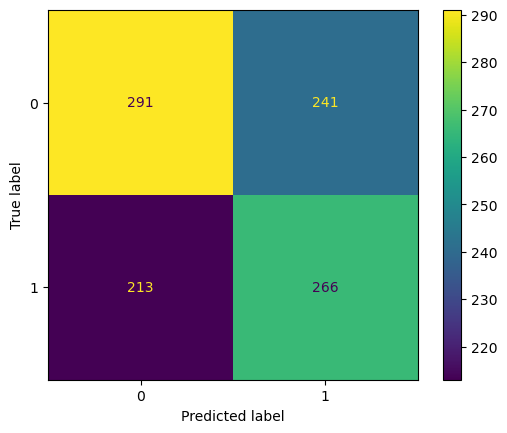

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display.plot()
plt.show()



In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)


    Accuracy:0.5509396636993076
    Precision:0.5553235908141962
    Recall:0.52465483234714
    F1:0.539553752535497

